In [2]:
import sys
import numpy as np
import exemplos.plot_graph as pg
import matplotlib.pyplot as plt
from exemplos.GFT import GFT
from functools import reduce

import warnings
warnings.filterwarnings('ignore')
import networkx as nx

import seaborn as sns
from matplotlib.colors import ListedColormap


In [3]:
adj_file = 'exemplos/points40_2d3.adj'
xy_file = 'exemplos/points40_2d3.xy'

A = np.loadtxt(adj_file)
p = np.loadtxt(xy_file)

D = np.diag(np.sum(A,axis=0))
L = D - A

G=nx.from_numpy_matrix(A)



In [4]:
############
## Filtering Coordinates
############
n = p.shape[0]
fsx = p[:,0]
fsy = p[:,1]

#### original #####
gftx = GFT(L)
gftx.set_signal(fsx)
spc_fsx = gftx.gft()

gfty = GFT(L)
gfty.set_signal(fsy)
spc_fsy = gfty.gft()

#### Low Pass X #####
S = gftx.get_spec()
h = np.exp(np.divide(-(2*S)**2,2.0*S[-1]))
he = h
#h2 = np.exp(np.divide(-(3*(S[-1]-S))**2,2.0*S[-1]))
#he = h+h2
spc_fsxf = gftx.filtering(he.ravel())

gftfsxf = GFT(L)
gftfsxf.set_gft_as_kernel(spc_fsxf)
ifsxf = gftfsxf.igft()

#### Low Pass y #####
spc_fsyf = gfty.filtering(he.ravel())

gftfsyf = GFT(L)
gftfsyf.set_gft_as_kernel(spc_fsyf)
ifsyf = gftfsyf.igft()


pn=np.zeros((p.shape[0],2))
pn[:,0]=ifsxf[:,0]
pn[:,1]=ifsyf[:,0]

pnx=np.zeros((p.shape[0],2))
pnx[:,0]=ifsxf[:,0]
pnx[:,1]=p[:,1]

pny=np.zeros((p.shape[0],2))
pny[:,0]=p[:,0]
pny[:,1]=ifsyf[:,0]

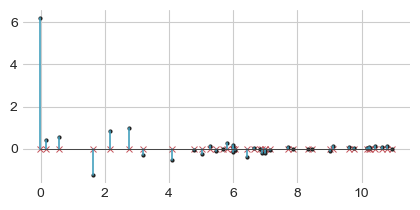

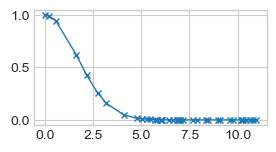

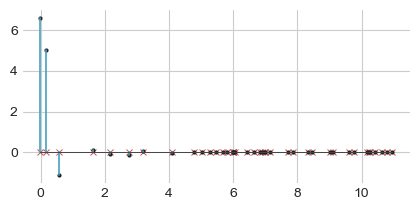

In [13]:
sns.set_style("whitegrid")

plt.figure(figsize=(5,2.25))
fs = spc_fsx
plt.plot(S, [0]*fs.size, 'x', color='#C3535A', markersize=4, mew=.7)
markerline, stemlines, baseline = plt.stem(S, fs, linefmt='k-', markerfmt='bo', basefmt='k-')
plt.setp(markerline, 'color', '#222222', 'markersize', 2) 
plt.setp(stemlines, 'color', '#44a1be', 'linewidth',1.2) 
plt.setp(baseline, 'color', '#444444', 'linewidth', .7) 
plt.savefig('ex4_fsx.pdf',bbox_inches='tight')
# plt.axis('off')
sns.despine(left=True, bottom=True)

plt.show()


plt.figure(figsize=(5,2.25))
fs = spc_fsy
plt.plot(S, [0]*fs.size, 'x', color='#C3535A', markersize=4, mew=.7)
markerline, stemlines, baseline = plt.stem(S, fs, linefmt='k-', markerfmt='bo', basefmt='k-')
plt.setp(markerline, 'color', '#222222', 'markersize', 2) 
plt.setp(stemlines, 'color', '#44a1be', 'linewidth',1.2) 
plt.setp(baseline, 'color', '#444444', 'linewidth', .7) 
plt.savefig('ex4_fsy.pdf',bbox_inches='tight')
# plt.axis('off')
sns.despine(left=True, bottom=True)

plt.show()

plt.figure(figsize=(3,1.5))
plt.plot(S, h, linewidth=1, marker='x',markersize=4)
# plt.plot(lam, np.zeros((lam.size,)), marker='x', markersize=1, alpha=0.7, color='red')
plt.savefig('ex4_low.pdf',bbox_inches='tight')
plt.show()


plt.figure(figsize=(5,2.25))
fs = spc_fsxf
plt.plot(S, [0]*fs.size, 'x', color='#C3535A', markersize=4, mew=.7)
markerline, stemlines, baseline = plt.stem(S, fs, linefmt='k-', markerfmt='bo', basefmt='k-')
plt.setp(markerline, 'color', '#222222', 'markersize', 2) 
plt.setp(stemlines, 'color', '#44a1be', 'linewidth',1.2) 
plt.setp(baseline, 'color', '#444444', 'linewidth', .7) 
plt.savefig('ex4_fsxf.pdf',bbox_inches='tight')
# plt.axis('off')
sns.despine(left=True, bottom=True)

plt.show()


plt.figure(figsize=(5,2.25))
fs = spc_fsyf
plt.plot(S, [0]*fs.size, 'x', color='#C3535A', markersize=4, mew=.7)
markerline, stemlines, baseline = plt.stem(S, fs, linefmt='k-', markerfmt='bo', basefmt='k-')
plt.setp(markerline, 'color', '#222222', 'markersize', 2) 
plt.setp(stemlines, 'color', '#44a1be', 'linewidth',1.2) 
plt.setp(baseline, 'color', '#444444', 'linewidth', .7) 
plt.savefig('ex4_fsyf.pdf',bbox_inches='tight')
# plt.axis('off')
sns.despine(left=True, bottom=True)

plt.show()

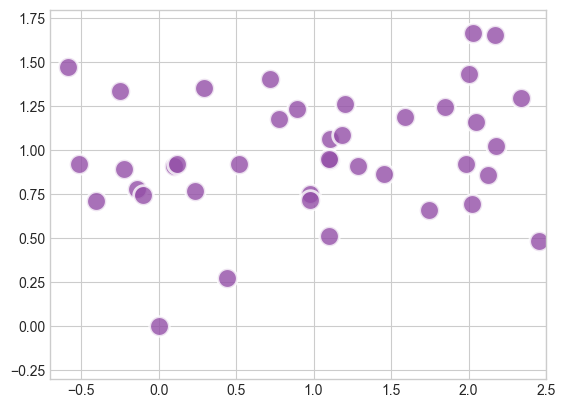

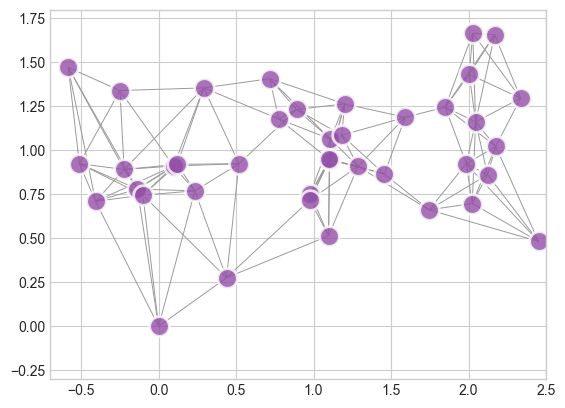

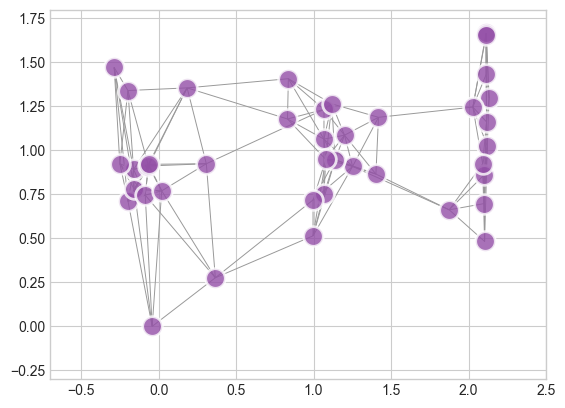

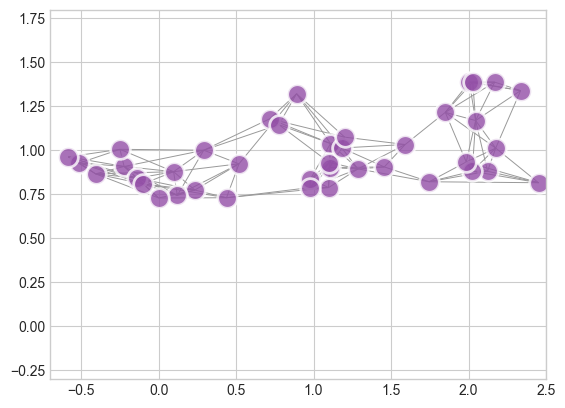

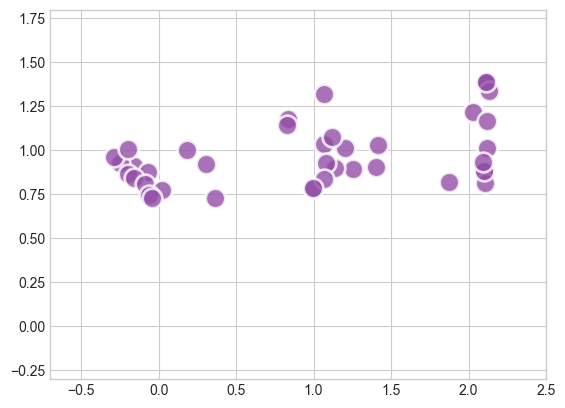

In [12]:

cmap = ListedColormap(sns.color_palette("GnBu_d",255)[::-1])
# cmap = sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.75)
# cmap = sns.diverging_palette(245, 20, n=7,as_cmap=True)

xmin = -0.7
xmax = 2.5
ymin = -0.3
ymax = 1.8

ns = 200
nc ='#934ea7'

sns.set_style("whitegrid")

nodes = nx.draw_networkx_nodes(G, pos=p,node_color=nc, node_size=ns, cmap=cmap)
nodes.set_edgecolor('#ffffff')
nodes.set_linewidth(2)
nodes.set_alpha(.8)
ax = plt.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# plt.gca().grid()
# plt.colorbar(nodes)
plt.savefig('3gauss-scatter.pdf',bbox_inches='tight')
plt.show()


nodes = nx.draw_networkx_nodes(G, pos=p,node_color=nc, node_size=ns, cmap=cmap)
nodes.set_edgecolor('#ffffff')
nodes.set_linewidth(2)
nodes.set_alpha(.8)
nx.draw_networkx_edges(G, pos=p,  edge_color="#999999", width=.7)
ax = plt.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# plt.gca().grid()
# plt.colorbar(nodes)
plt.savefig('3gauss-graph.pdf',bbox_inches='tight')
plt.show()

nodes = nx.draw_networkx_nodes(G, pos=pnx,node_color=nc, node_size=ns, cmap=cmap)
nodes.set_edgecolor('#ffffff')
nodes.set_linewidth(2)
nodes.set_alpha(.8)
nx.draw_networkx_edges(G, pos=pnx,  edge_color="#999999", width=.7)
ax = plt.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# plt.gca().grid()
# plt.colorbar(nodes)
plt.savefig('3gauss-fx.pdf',bbox_inches='tight')
plt.show()


nodes = nx.draw_networkx_nodes(G, pos=pny,node_color=nc, node_size=ns, cmap=cmap)
nodes.set_edgecolor('#ffffff')
nodes.set_linewidth(2)
nodes.set_alpha(.8)
nx.draw_networkx_edges(G, pos=pny,  edge_color="#999999", width=.7)
ax = plt.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# plt.colorbar(nodes)
plt.savefig('3gauss-fy.pdf',bbox_inches='tight')
plt.show()

nodes = nx.draw_networkx_nodes(G, pos=pn,node_color=nc, node_size=ns, cmap=cmap)
nodes.set_edgecolor('#ffffff')
nodes.set_linewidth(2)
nodes.set_alpha(.8)
ax = plt.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# plt.colorbar(nodes)
plt.savefig('3gauss-fscatter.pdf',bbox_inches='tight')
plt.show()

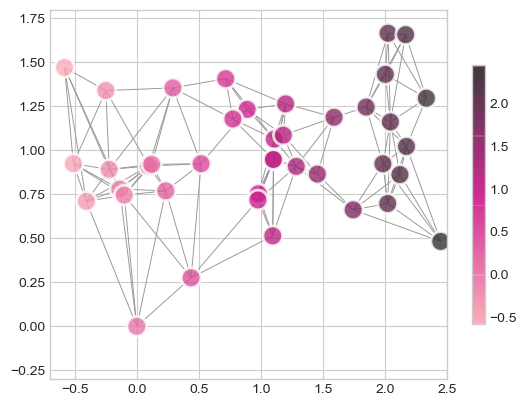

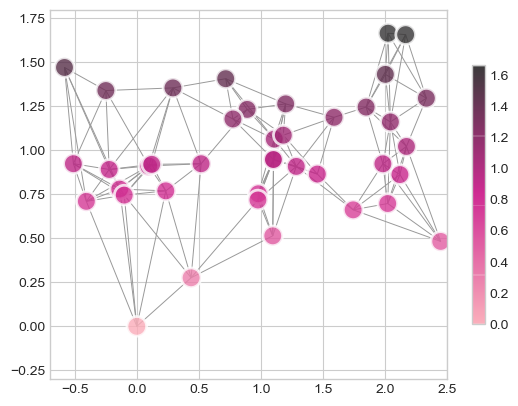

In [14]:
cmap = ListedColormap(sns.color_palette("RdPu_d",255)[::-1])
# cmap = sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.75)
# cmap = sns.diverging_palette(245, 20, n=7,as_cmap=True)

xmin = -0.7
xmax = 2.5
ymin = -0.3
ymax = 1.8

ns = 200
nc ='#934ea7'

sns.set_style("whitegrid")

nodes = nx.draw_networkx_nodes(G, pos=p,node_color=p[:,0], node_size=ns, cmap=cmap)
nodes.set_edgecolor('#ffffff')
nodes.set_linewidth(2)
nodes.set_alpha(.8)
nx.draw_networkx_edges(G, pos=p,  edge_color="#999999", width=.7)
ax = plt.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# plt.gca().grid()
plt.colorbar(nodes, shrink=.7)
plt.savefig('3gauss-graph_x.pdf',bbox_inches='tight')
plt.show()

nodes = nx.draw_networkx_nodes(G, pos=p,node_color=p[:,1], node_size=ns, cmap=cmap)
nodes.set_edgecolor('#ffffff')
nodes.set_linewidth(2)
nodes.set_alpha(.8)
nx.draw_networkx_edges(G, pos=p,  edge_color="#999999", width=.7)
ax = plt.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# plt.gca().grid()
plt.colorbar(nodes, shrink=.7)
plt.savefig('3gauss-graph_y.pdf',bbox_inches='tight')
plt.show()

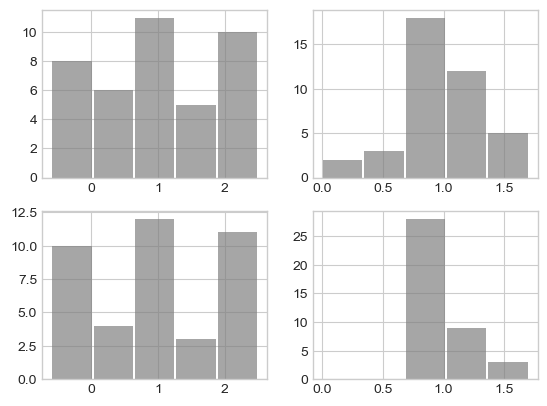

In [29]:
fig = plt.figure(10)
ax = fig.add_subplot(221)
plt.hist(p[:,0],np.linspace(-0.6,2.5,6),facecolor='gray', rwidth=.95, alpha=0.7)
ax = fig.add_subplot(222)
plt.hist(p[:,1],np.linspace(0, 1.7, 6),facecolor='gray', rwidth=.95, alpha=0.7)
ax = fig.add_subplot(223)
plt.hist(pn[:,0],np.linspace(-0.6,2.5,6),facecolor='gray', rwidth=.95, alpha=0.7)
ax = fig.add_subplot(224)
plt.hist(pn[:,1],np.linspace(0, 1.7, 6),facecolor='gray', rwidth=.95, alpha=0.7)

plt.savefig('3gauss-hist.pdf',bbox_inches='tight')

plt.show()

(0.0, 1.6653979999999999)